In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('145325-regression.txt', sep='\t')
X = df.drop(columns='class').values
y = df['class'].values
print(X.shape, y.shape)

(435, 77) (435,)


In [4]:
stats = []
for i in range(45):
    stats.append(f'stat{i}')
# df.describe()
print(df["class"].max(), df["class"].min())

3056.0 36.0


In [5]:
df.describe()

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,...,stat36,stat37,stat38,stat39,stat40,stat41,stat42,stat43,stat44,class
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,...,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.012071,0.109289,0.142156,0.179829,0.203741,0.224319,0.249344,0.230200,0.196487,0.138763,...,0.248285,0.164142,0.235431,0.274832,0.038885,-0.000252,0.030486,0.061849,1.623966,463.533333
std,0.004746,0.082997,0.109574,0.136900,0.141062,0.177564,0.174365,0.154836,0.144835,0.130382,...,0.149287,0.141999,0.135555,0.167602,0.073842,0.057400,0.065525,0.125322,0.308698,302.696544
min,0.003210,0.011637,0.008696,0.011622,0.014795,0.009602,0.005476,0.004196,0.004559,0.002747,...,-0.122220,-0.128840,-0.090919,-0.076879,-0.056060,-0.061345,-0.059685,-0.052316,0.681610,36.000000
25%,0.008459,0.057215,0.077655,0.092656,0.093899,0.091210,0.110365,0.119150,0.063751,0.025701,...,0.143020,0.056087,0.147455,0.162790,-0.018919,-0.039463,-0.016315,-0.012159,1.437100,256.250000
50%,0.011050,0.086905,0.111160,0.136370,0.173360,0.165050,0.208640,0.206320,0.189900,0.105860,...,0.249640,0.157110,0.233590,0.246820,0.023174,-0.019452,0.014500,0.020787,1.680700,408.000000
75%,0.015169,0.131545,0.163995,0.229935,0.285320,0.295520,0.340870,0.307865,0.275770,0.217780,...,0.349500,0.252940,0.324240,0.357195,0.074500,0.018387,0.060682,0.084677,1.876000,592.000000
max,0.033083,0.611990,0.685600,0.693360,0.711250,0.794300,0.772940,0.766240,0.747510,0.640130,...,0.613000,0.640300,0.648920,0.927160,0.277160,0.306470,0.309090,0.833180,2.175300,3056.000000


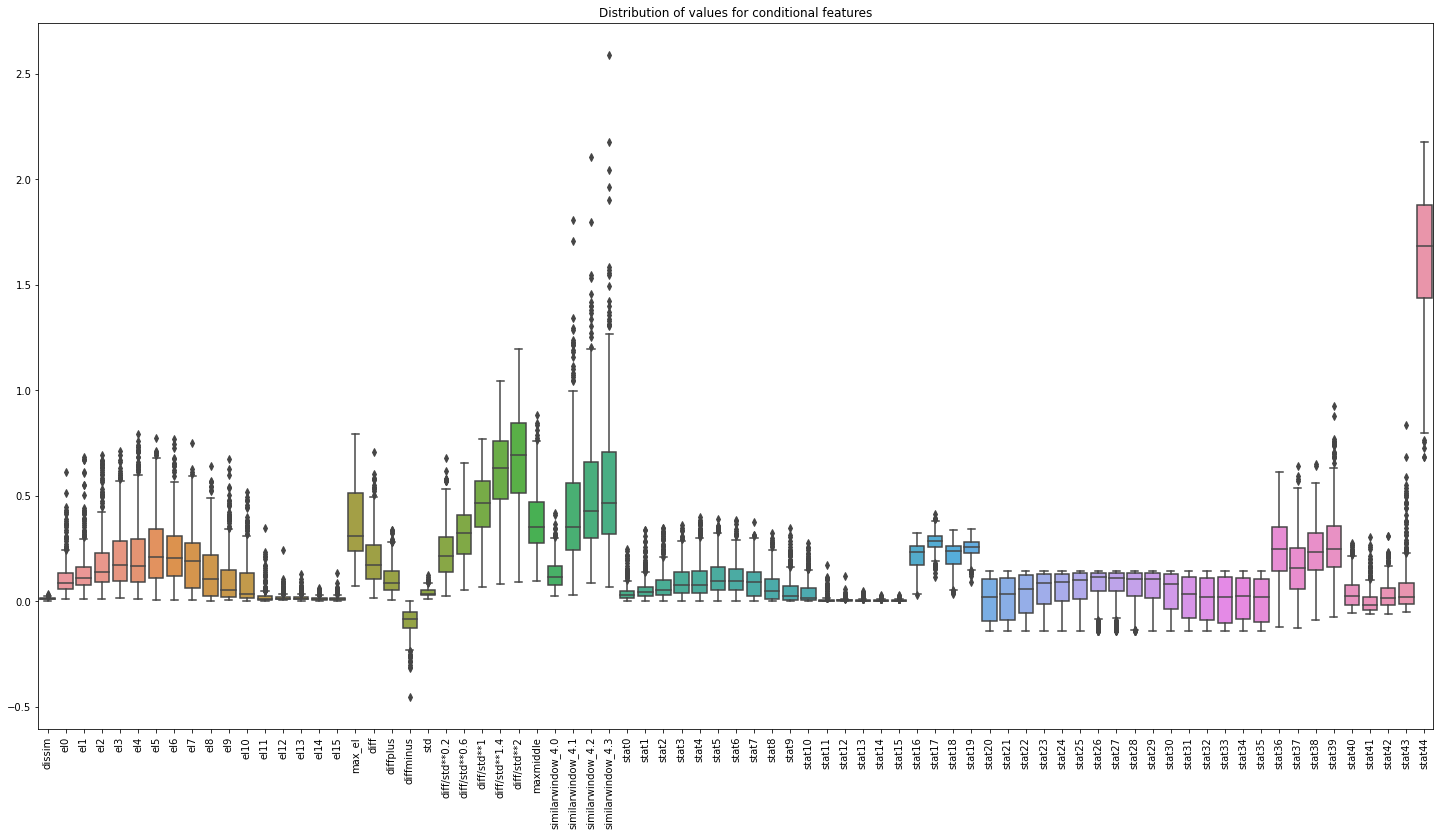

In [12]:

plt.subplots(figsize=(25, 13), facecolor=(1, 1, 1))
sns.boxplot(data=df.drop(columns='class'))
plt.xticks(rotation=90)
plt.title('Distribution of values for conditional features')
plt.savefig('wykres_pudelkowy_zadanie_2.png')

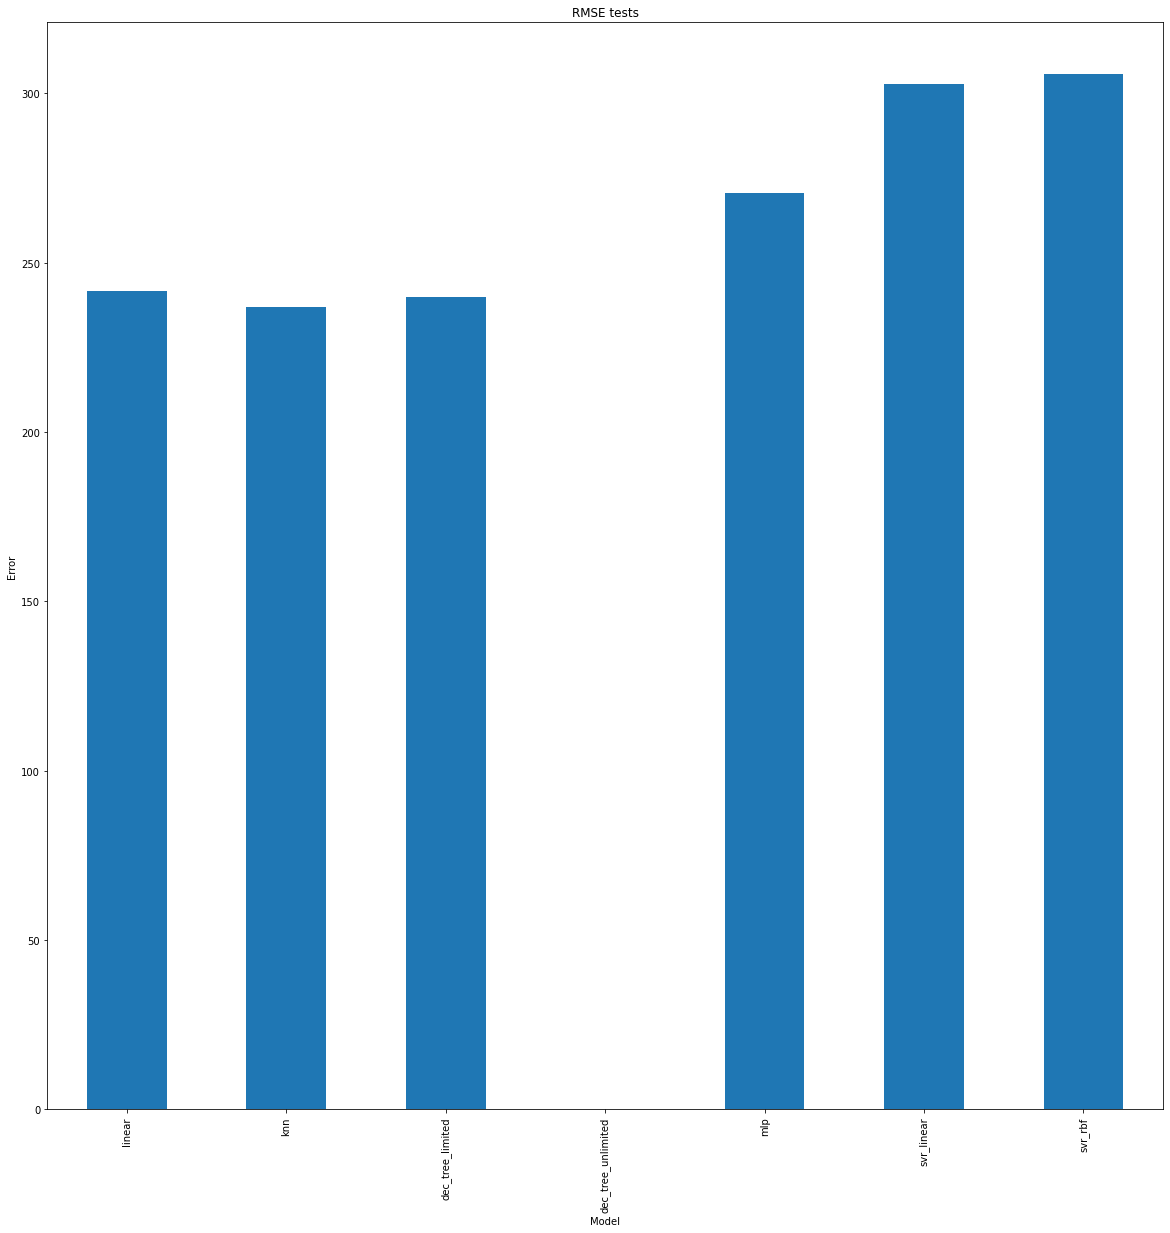

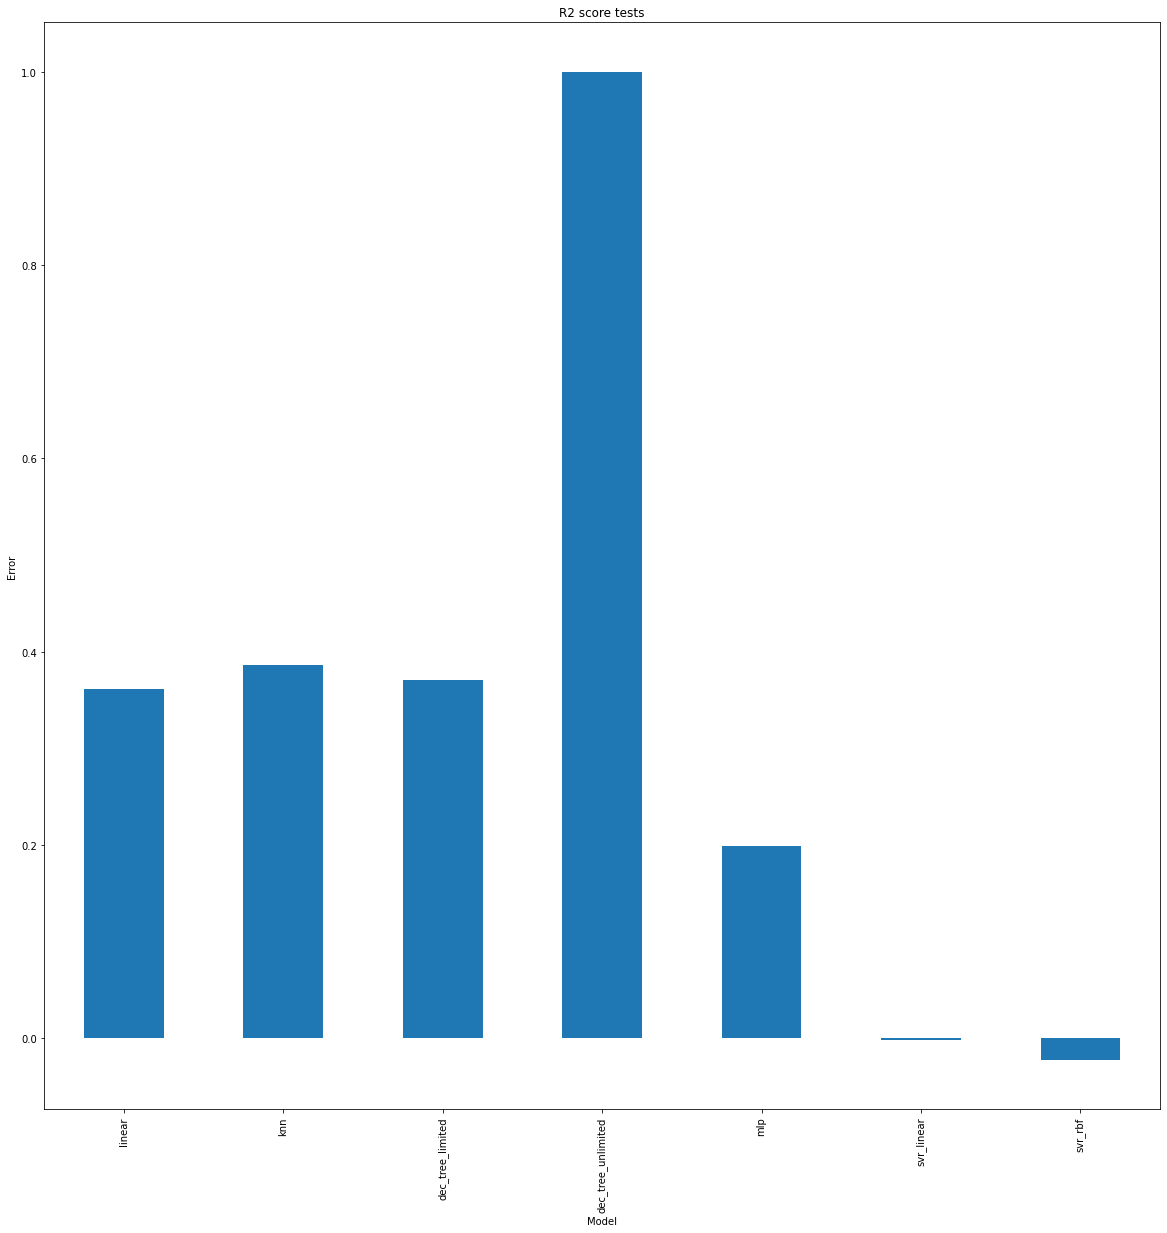

In [42]:
from sklearn import linear_model
from sklearn import neighbors # KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {'linear': linear_model.LinearRegression(), 'knn': neighbors.KNeighborsRegressor(),  'dec_tree_limited': DecisionTreeRegressor(max_depth=2), 'dec_tree_unlimited': DecisionTreeRegressor(max_depth=None), 'mlp': MLPRegressor(max_iter=10000), 'svr_linear': SVR(kernel='linear'), 'svr_rbf': SVR(kernel='rbf')}

results_rmse = []
results_r2 = []
for model_name, model in models.items():
    model.fit(X, y)
    Y = model.predict(X)
    results_rmse.append(dict(Model=model_name, RMSE=np.sqrt(mean_squared_error(y, Y))))
    results_r2.append(dict(Model=model_name, R2=r2_score(y, Y)))

results_rmse = pd.DataFrame(results_rmse)
results_r2 = pd.DataFrame(results_r2)


results_rmse.plot(x="Model", kind="bar", figsize=(20, 20), title="RMSE tests", legend=None)
plt.ylabel("Error")
plt.savefig('porownanie_zadanie_5_rmse', facecolor=(1, 1, 1))


results_r2.plot(x="Model", kind="bar", figsize=(20, 20), title="R2 score tests", legend=None)
plt.ylabel("Error")
plt.savefig('porownanie_zadanie_5_r2_score', facecolor=(1, 1, 1))



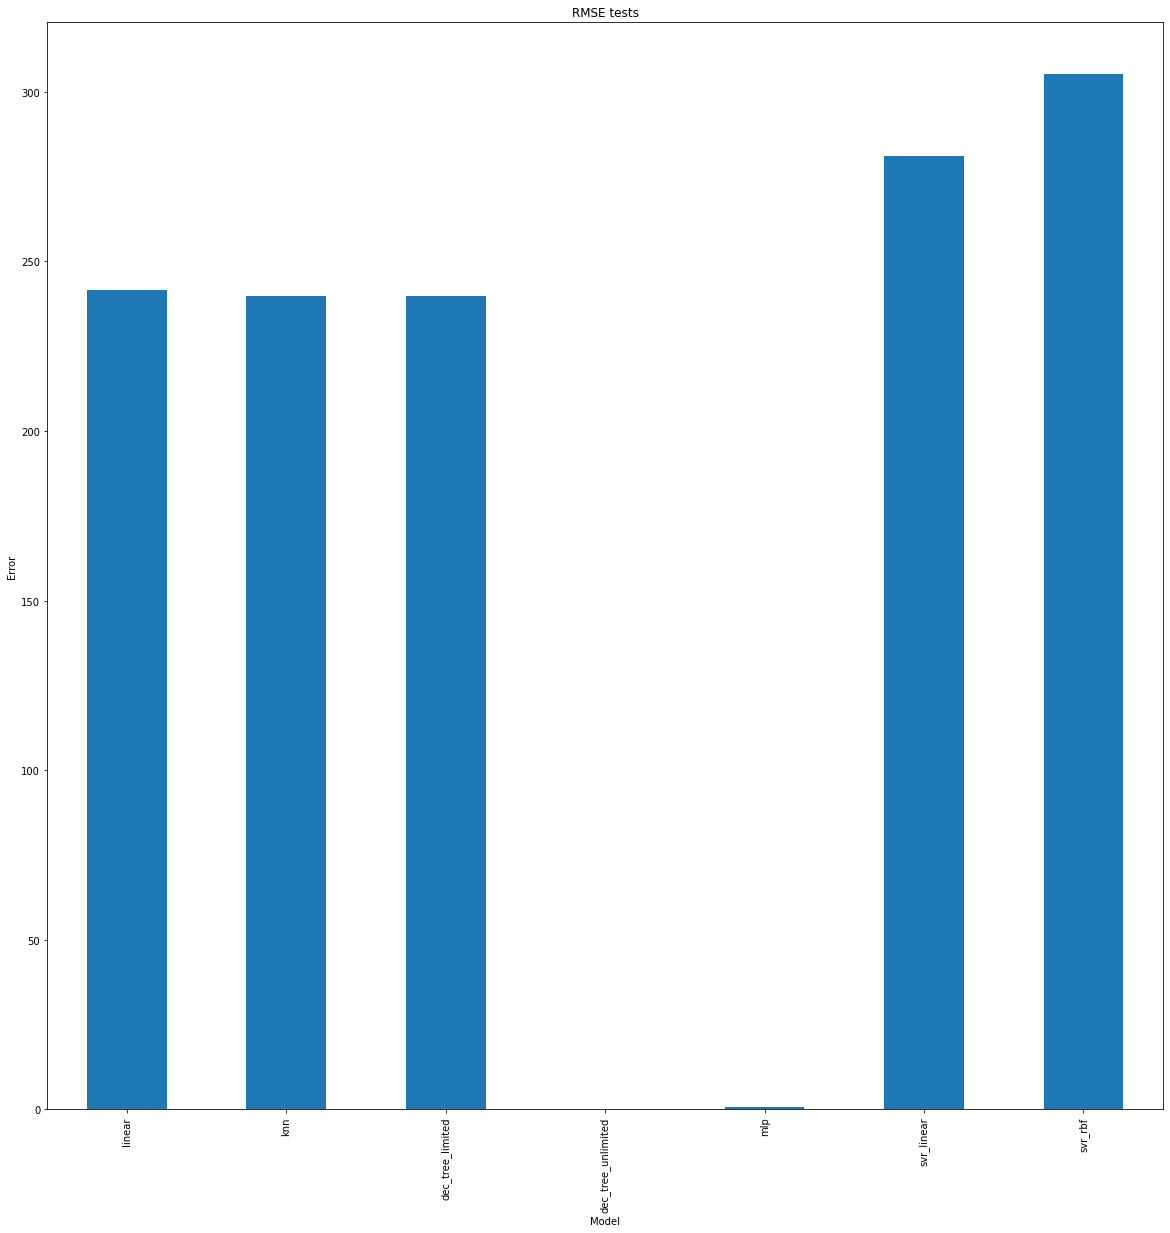

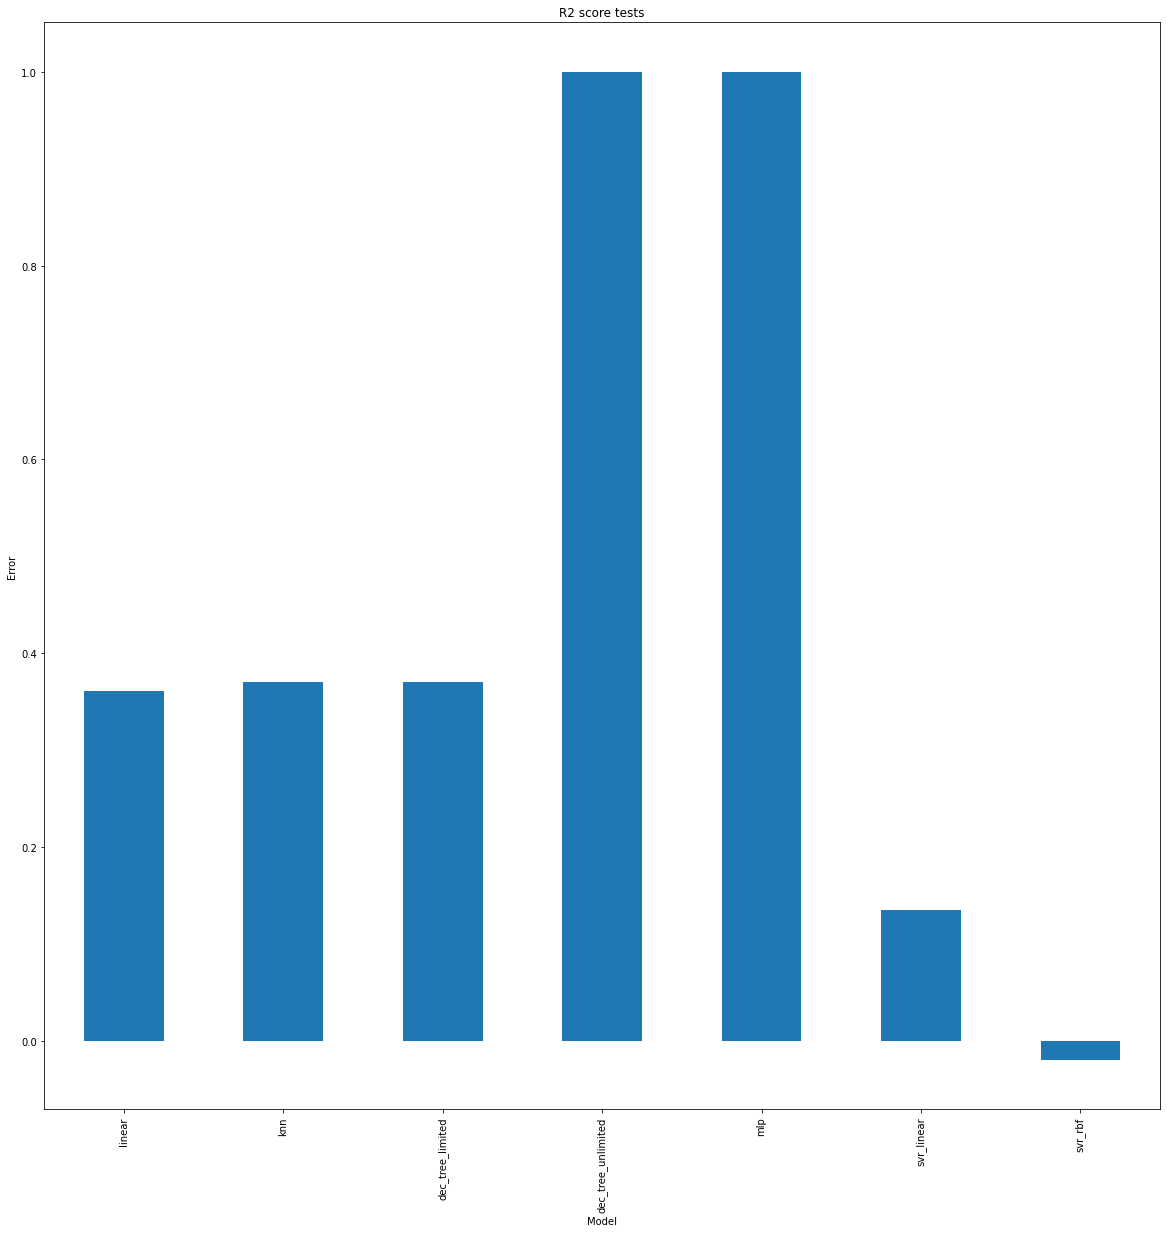

In [44]:
from sklearn import linear_model
from sklearn import neighbors # KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np


print_metrics = lambda regresor, opis, X, y: print(opis,': R^2=%.2f,'%regresor.score(X, y),' RMSE=%.1f'%np.sqrt(mean_squared_error(y, regresor.predict(X))))
models = {'linear': linear_model.LinearRegression(),
          'knn': make_pipeline(StandardScaler(), neighbors.KNeighborsRegressor()),
          'dec_tree_limited': DecisionTreeRegressor(max_depth=2),
          'dec_tree_unlimited': DecisionTreeRegressor(max_depth=None),
          'mlp': make_pipeline(StandardScaler(), MLPRegressor(max_iter=10000)), 
          'svr_linear': make_pipeline(StandardScaler(), SVR(kernel='linear')), 
          'svr_rbf': make_pipeline(StandardScaler(), SVR(kernel='rbf'))
    }

results_rmse = []
results_r2 = []
for model_name, model in models.items():
    model.fit(X, y)
    Y = model.predict(X)
    results_rmse.append(dict(Model=model_name, RMSE=np.sqrt(mean_squared_error(y, Y))))
    results_r2.append(dict(Model=model_name, R2=r2_score(y, Y)))

results_rmse = pd.DataFrame(results_rmse)
results_r2 = pd.DataFrame(results_r2)


results_rmse.plot(x="Model", kind="bar", figsize=(20, 20), title="RMSE tests", legend=None)
plt.ylabel("Error")
plt.savefig('porownanie_zadanie_6_rmse_standardised', facecolor=(1, 1, 1))


results_r2.plot(x="Model", kind="bar", figsize=(20, 20), title="R2 score tests", legend=None)
plt.ylabel("Error")
plt.savefig('porownanie_zadanie_6_r2_score_standardised', facecolor=(1, 1, 1))



In [51]:
results_rmse

,Model,RMSE
0,linear,241.596364
1,knn,239.803160
2,dec_tree_limited,239.868180
3,dec_tree_unlimited,0.000000
4,mlp,0.621797
5,svr_linear,281.078073
6,svr_rbf,305.262884


In [52]:
results_r2

,Model,R2
0,linear,0.361493
1,knn,0.370937
2,dec_tree_limited,0.370595
3,dec_tree_unlimited,1.000000
4,mlp,0.999996
5,svr_linear,0.135752
6,svr_rbf,-0.019372


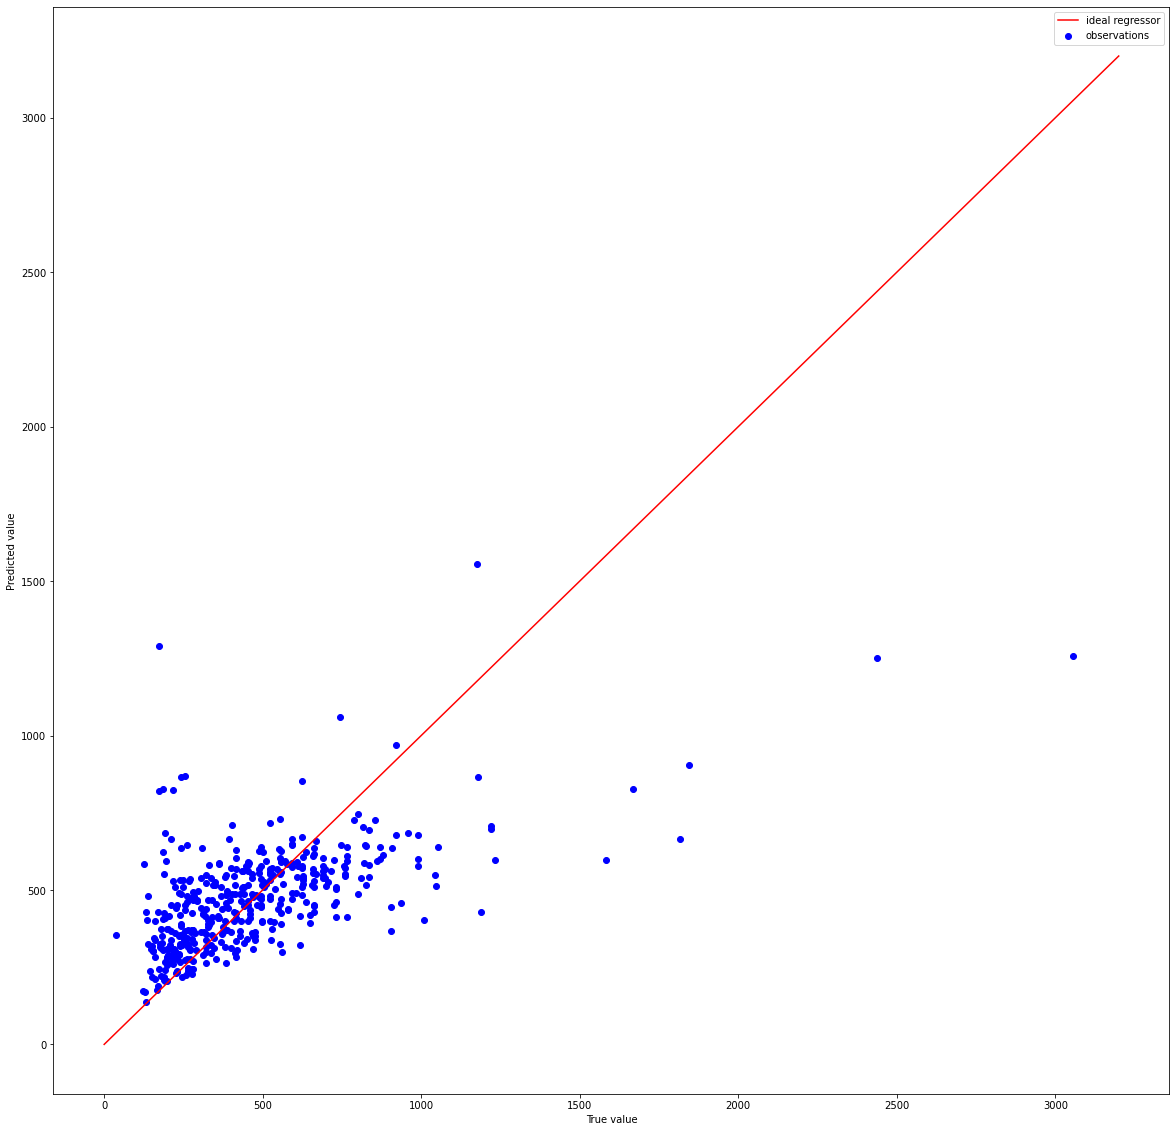

In [60]:
model = make_pipeline(StandardScaler(), neighbors.KNeighborsRegressor())
model.fit(X, y)
Y = model.predict(X)

ideal_x = np.linspace(0, 3200, 2)
plt.figure(figsize=(20, 20))
plt.plot(ideal_x, ideal_x, color='red', label="ideal regressor")
plt.legend()
plt.scatter(y, Y, c="blue", label="observations")
plt.legend()
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.savefig('predykcje_knn_zadanie7', facecolor=(1, 1, 1))

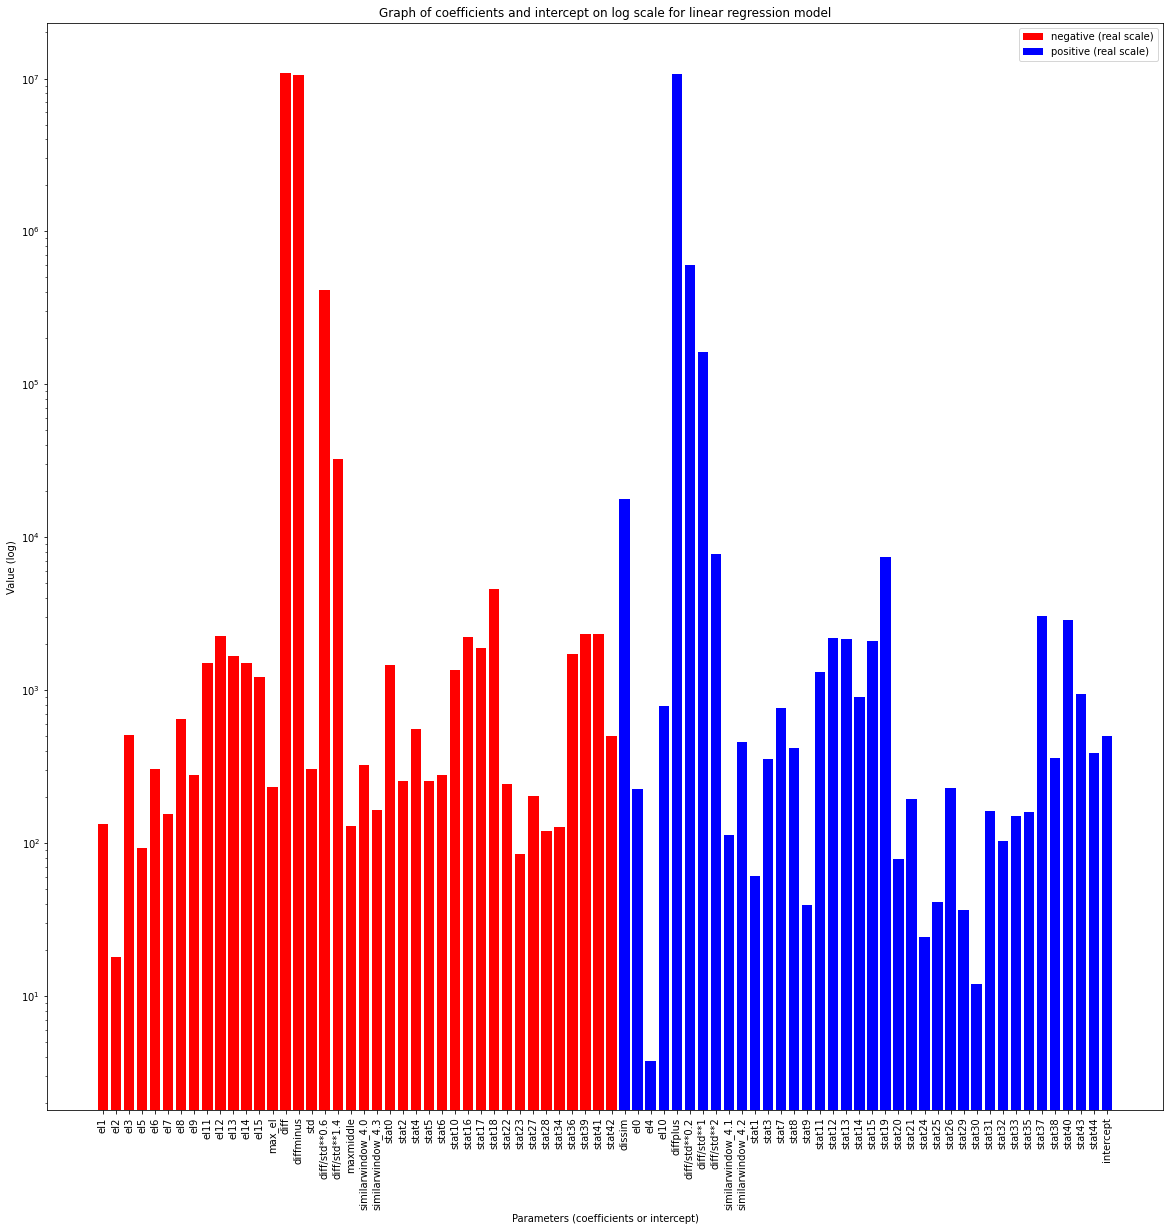

In [99]:
model = linear_model.LinearRegression()
model.fit(X, y)
Y = model.predict(X)


negative_values = [coef for coef in model.coef_ if coef < 0]
positive_values = [coef for coef in model.coef_ if coef >= 0]
column_names = np.array(list(df.columns[:-1]) + ['intercept'])
values = np.array(list(model.coef_) + [model.intercept_])
negative_args = values < 0
positive_args = values >= 0

plt.figure(figsize=(20, 20))
plt.bar(column_names[negative_args], -values[negative_args], color='red', label="negative (real scale)")
plt.bar(column_names[positive_args], values[positive_args], color='blue', label="positive (real scale)")
plt.legend()
plt.title("Graph of coefficients and intercept on log scale for linear regression model")
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Parameters (coefficients or intercept)')
plt.ylabel('Value (log)')
plt.savefig('najlepiej_interpretowalny_model_zadanie_8', facecolor=(1, 1, 1))

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

models = {'linear': linear_model.LinearRegression(),
          'knn': make_pipeline(StandardScaler(), neighbors.KNeighborsRegressor()),
          'dec_tree_limited': DecisionTreeRegressor(max_depth=2),
          'dec_tree_unlimited': DecisionTreeRegressor(max_depth=None),
          'mlp': make_pipeline(StandardScaler(), MLPRegressor(max_iter=10000)), 
          'svr_linear': make_pipeline(StandardScaler(), SVR(kernel='linear')), 
          'svr_rbf': make_pipeline(StandardScaler(), SVR(kernel='rbf'))
    }

results_rmse = []
results_r2 = []

for model_name, model in models.items():
    model.fit(X, y)
    Y = model.predict(X)
    scores = cross_validate(model, X, y, scoring=dict(RMSE=make_scorer(mean_squared_error), R2=make_scorer(r2_score)), cv=10)
    results_rmse.append(dict(Model=model_name, all=np.sqrt(mean_squared_error(y, Y)), cv=np.mean(np.sqrt(scores['test_RMSE']))))
    results_r2.append(dict(Model=model_name, all=r2_score(y, Y), R2=np.mean(scores['test_R2'])))

results_rmse = pd.DataFrame(results_rmse)
results_r2 = pd.DataFrame(results_r2)

In [7]:
results_rmse

,Model,all,cv
0,linear,241.596364,306.185750
1,knn,239.803160,307.392700
2,dec_tree_limited,239.868180,317.225424
3,dec_tree_unlimited,0.000000,392.284223
4,mlp,1.148327,408.574558
5,svr_linear,281.078073,270.309071
6,svr_rbf,305.262884,292.234934


In [10]:
results_r2

,Model,all,cv
0,linear,0.361493,-6.595331
1,knn,0.370937,-8.851512
2,dec_tree_limited,0.370595,-5.230614
3,dec_tree_unlimited,1.000000,-10.593956
4,mlp,0.999986,-14.454427
5,svr_linear,0.135752,-2.573411
6,svr_rbf,-0.019372,-4.816659


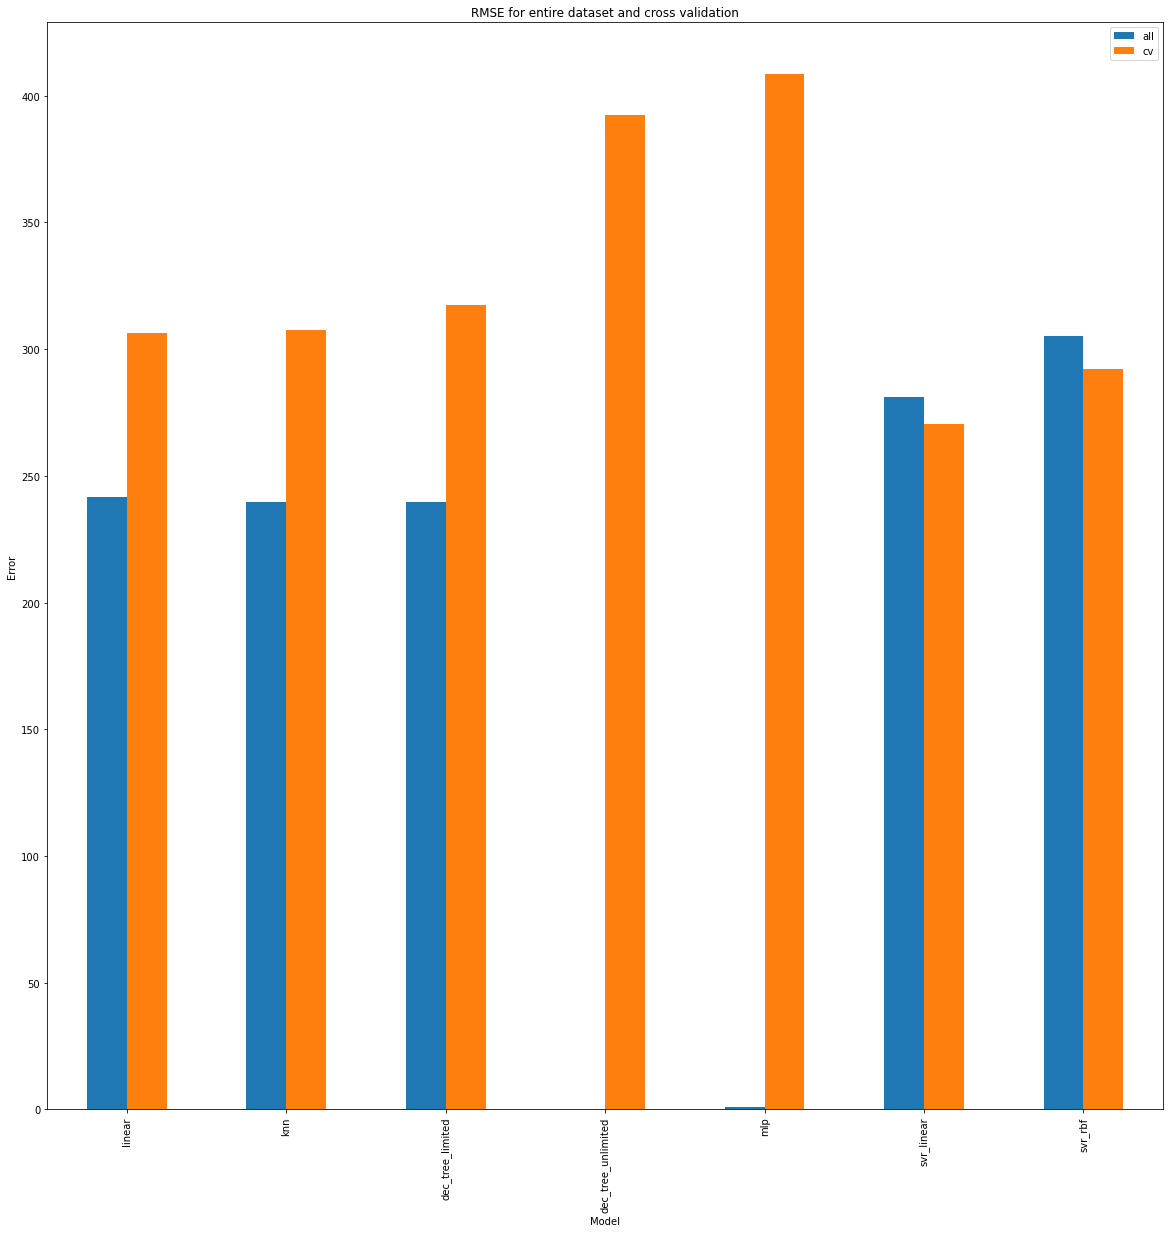

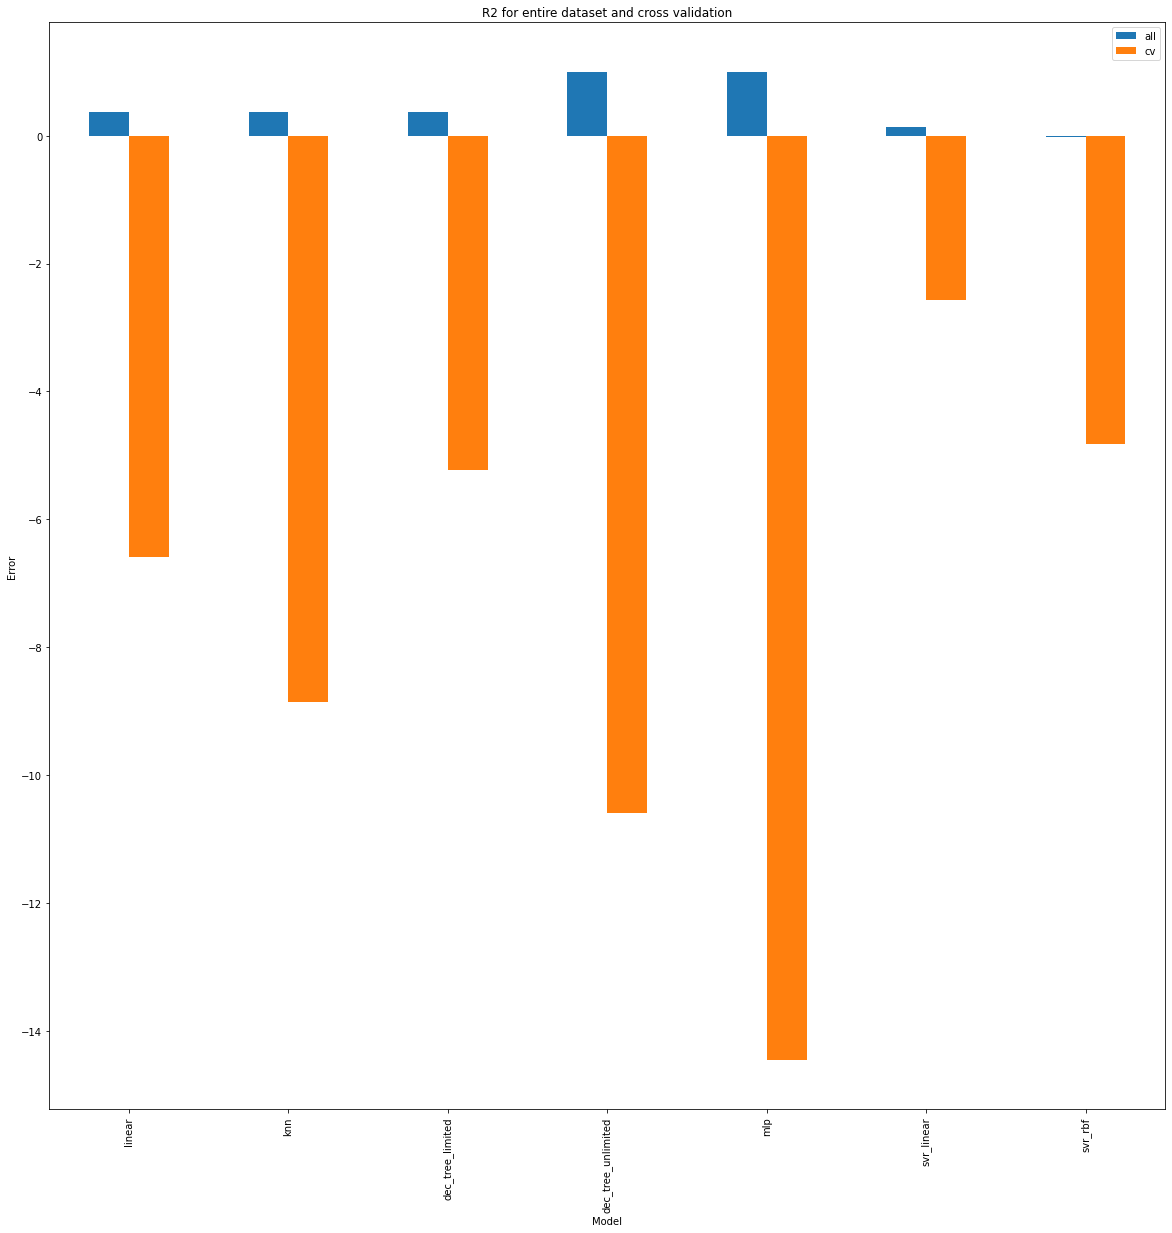

In [11]:
results_rmse.plot(x="Model", kind="bar", figsize=(20, 20), title="RMSE for entire dataset and cross validation")
plt.ylabel("Error")
plt.savefig('porownanie_cross_validation_zadanie_9_rmse', facecolor=(1, 1, 1))


results_r2.plot(x="Model", kind="bar", figsize=(20, 20), title="R2 for entire dataset and cross validation")
plt.ylabel("Error")
plt.savefig('porownanie_cross_validation_zadanie_9_r2', facecolor=(1, 1, 1))